<a href="https://colab.research.google.com/github/asmakrl/datacampstd/blob/main/Model_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split,KFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn import metrics

In [2]:
california = fetch_california_housing()

### Displaying the Dataset’s Description

In [3]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
california.data.shape

(20640, 8)

In [5]:
california.target.shape

(20640,)

In [6]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

EDA


In [7]:
california_df = pd.DataFrame(california.data, 
                              columns=california.feature_names)

In [8]:
california_df['MedHouseValue'] = pd.Series(california.target)

In [9]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
sns.set(font_scale=2)

In [12]:
sns.set_style('whitegrid')                                    

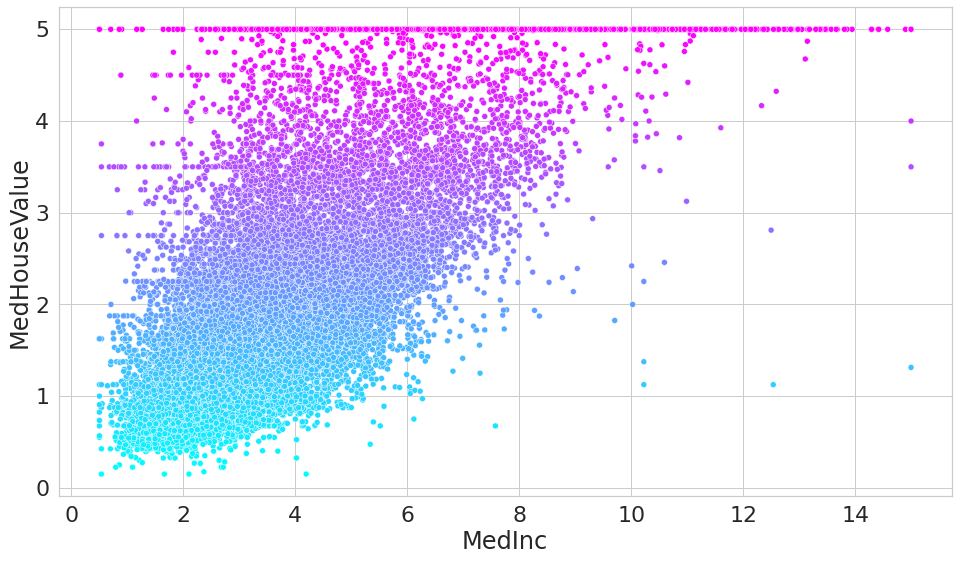

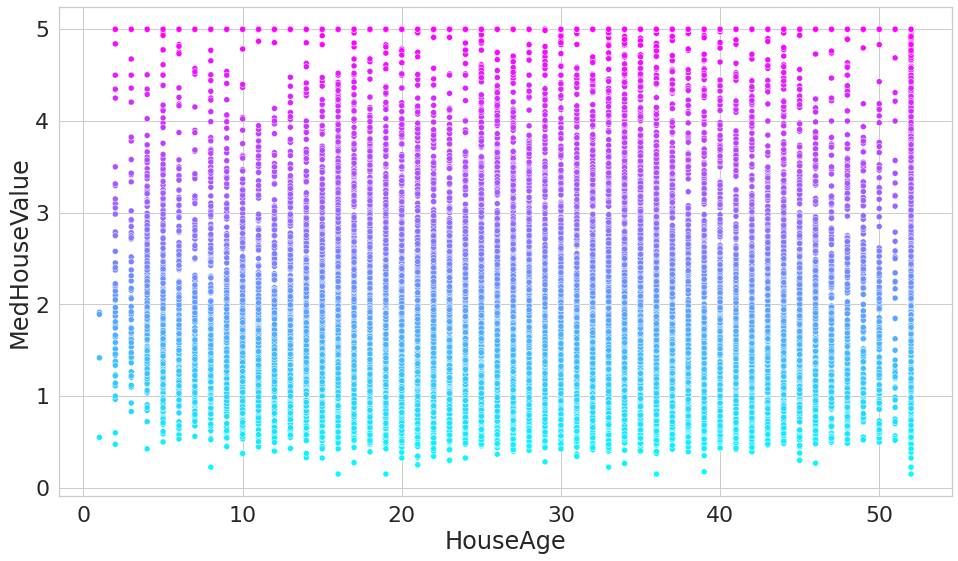

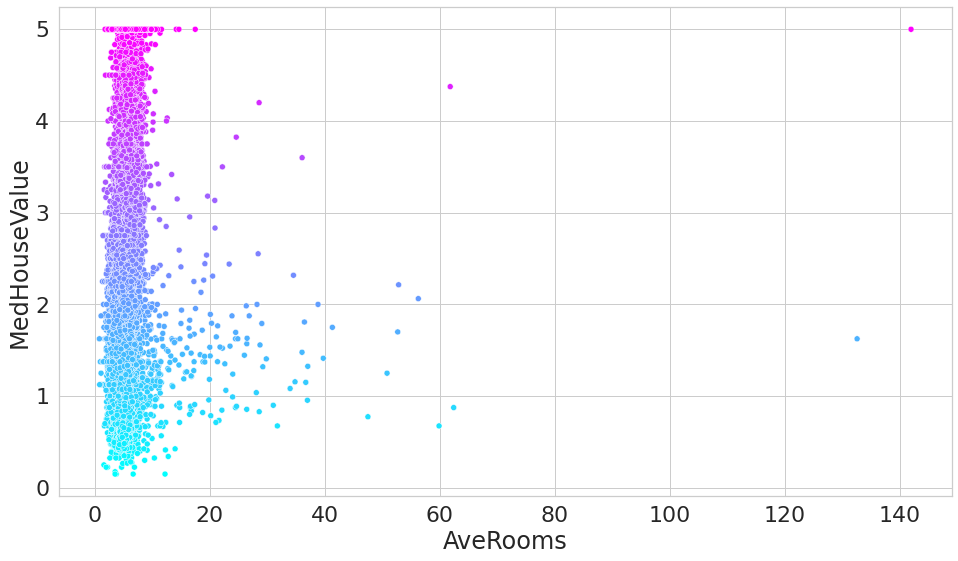

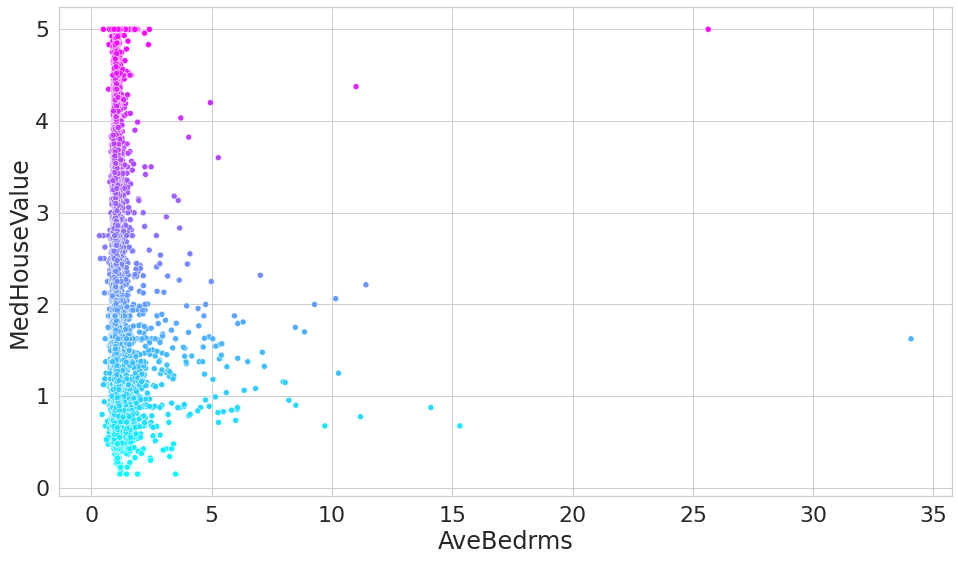

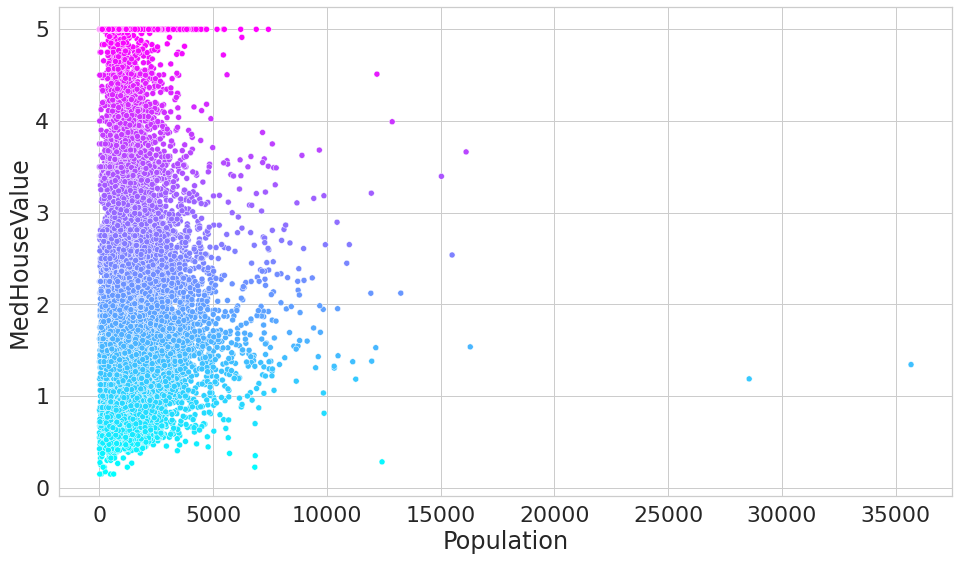

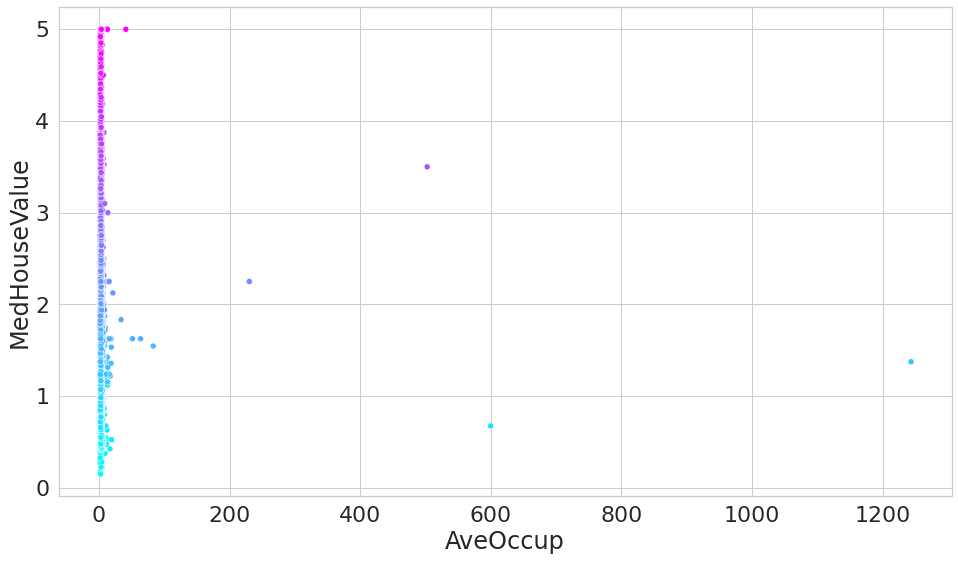

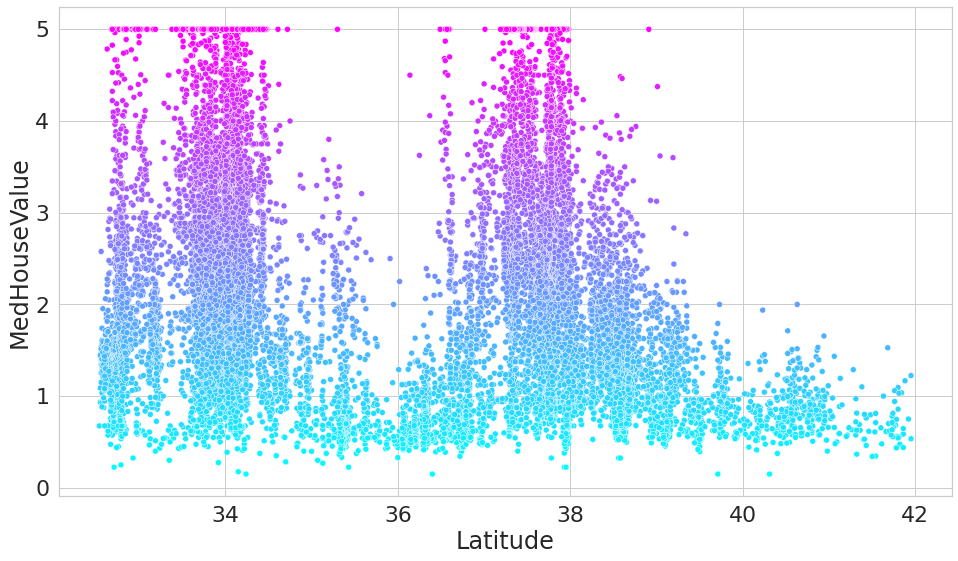

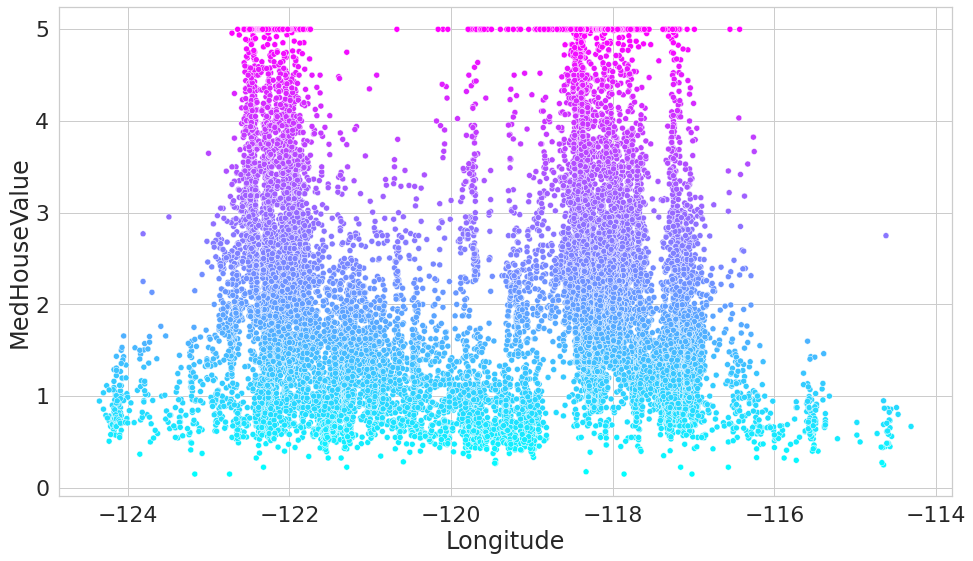

In [13]:
for feature in california.feature_names:
     plt.figure(figsize=(16, 9))
     sns.scatterplot(data=california_df, x=feature, 
                     y='MedHouseValue', hue='MedHouseValue', 
                     palette='cool', legend=False)
         

Splitting the Data for Training and Testing 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
     california.data, california.target, random_state=1110)

In [15]:
X_train.shape

(15480, 8)

In [16]:
X_test.shape

(5160, 8)

Training the Model 

In [17]:
lin_reg = LinearRegression()

In [18]:
lin_reg.fit(X=X_train, y=y_train)

LinearRegression()

In [19]:
for i, name in enumerate(california.feature_names):
     print(f'{name}: {lin_reg.coef_[i]}')

MedInc: 0.42934504821341624
HouseAge: 0.009301775853596282
AveRooms: -0.09790433837698664
AveBedrms: 0.5898581153385214
Population: -8.978403564108978e-07
AveOccup: -0.0033774975922662783
Latitude: -0.4271986799680667
Longitude: -0.4412901537478961


In [20]:
lin_reg.intercept_

-37.50553721064166

In [21]:
train_pred = lin_reg.predict(X_train)
metrics.r2_score(y_train, train_pred)

0.6015409667784357

Testing the Model 

In [22]:
test_pred = lin_reg.predict(X_test)

In [23]:
metrics.r2_score(y_test, test_pred)

0.6194436468965602

In [24]:
metrics.mean_absolute_error(y_test,test_pred) 

0.5306211224195606

In [25]:
metrics.mean_squared_error(y_test,test_pred)

0.5165999664384366

KFold

Choosing the Best Model

In [36]:
estimators = {
    'LinearRegression': lin_reg,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [47]:
mse = metrics.make_scorer(metrics.mean_squared_error)
for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=1110, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, 
         X=X_train, y=y_train, cv=kfold,
         scoring= mse)
     print(f'{estimator_name}: ' + f'mean_squared_error={scores.mean()}')

LinearRegression: mean_squared_error=0.531142277229171
ElasticNet: mean_squared_error=0.7715934105587554
Lasso: mean_squared_error=0.9562862086893722
Ridge: mean_squared_error=0.5311301185044585


In [51]:
# Implement LOOCV
scores = cross_val_score(lin_reg, X=X_train, y=y_train, cv=15480, scoring=mse)

# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(scores))
print("The standard deviation of the errors is: %s." % np.std(scores))

The mean of the errors is: 0.5320823963771337.
The standard deviation of the errors is: 1.4081580976148196.


Hyperparameter tuning requires selecting parameters to tune, as well the possible values these parameters can be set to.

In [52]:
# Review the parameters of lin_reg
print(lin_reg.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [59]:
copy_X = [True, False]
fit_intercept = [True, False]
n_jobs = [10,20,30]

In [60]:
legreg = LinearRegression(
    copy_X=random.choice(copy_X),
    fit_intercept=random.choice(fit_intercept),
    n_jobs=random.choice(n_jobs)
    )

# Print out the parameters
print(legreg.get_params())

{'copy_X': False, 'fit_intercept': True, 'n_jobs': 30, 'normalize': 'deprecated', 'positive': False}


Randomized Search

In [65]:
param_dist = {"copy_X": [True,False],
              "fit_intercept": [True,False],
              "n_jobs": [10,20,30]}
linreg = LinearRegression()

In [66]:
# Finalize the random search
rs = RandomizedSearchCV(
  estimator=linreg, param_distributions=param_dist,
  scoring = mse,
  cv=5, n_iter=10, random_state=1110)

rs.fit(X_train, y_train)

# print the mean test scores:
print('The accuracy for each run was: {}.'.format(rs.cv_results_['mean_test_score']))
# print the best model score:
print('The best accuracy for a single model was: {}'.format(rs.best_score_))

The accuracy for each run was: [0.62133408 0.53414022 0.62133408 0.53414022 0.53414022 0.53414022
 0.53414022 0.62133408 0.62133408 0.53414022].
The best accuracy for a single model was: 0.621334079642087


In [68]:
rs.best_estimator_

LinearRegression(copy_X=False, fit_intercept=False, n_jobs=10)